In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
import pandas as pd
import seaborn as sns
import statistics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.inspection import permutation_importance
from sklearn.model_selection import permutation_test_score
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import matthews_corrcoef
import shap
import statsmodels.api as sm
from sklearn.feature_selection import chi2, f_classif
from sklearn.calibration import calibration_curve
from scipy.stats import wilcoxon
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import statsmodels.stats.multitest as multitest

In [4]:
dataset = pd.read_csv('ADNI_digital_16_09_2020.csv')
#dataset = pd.read_csv('ADNI_shuffle_13_09_2020.csv')
dataset = dataset.drop(["FAQTOTAL"], axis = 1)
dataset = dataset.dropna()
dataset.columns

Index(['RID', 'VISCODE', 'DX', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT', 'PTRACCAT',
       'PTMARRY', 'APOE4', 'AGE', 'FAQFINAN', 'FAQFORM', 'FAQSHOP', 'FAQGAME',
       'FAQBEVG', 'FAQMEAL', 'FAQEVENT', 'FAQTV', 'FAQREM', 'FAQTRAVL',
       'zcode_BIT_AR', 'zcode_DOT_AR', 'zcode_DOT_AR_o2ATT',
       'zcode_BIT_motor_randomTapping', 'zcode_BIT_AR_o3ACC',
       'zcode_BIT_motor_tapping', 'zcode_DOT_motor_serpentine',
       'zcode_DOT_AR_o3ACC', 'zcode_BIT_AR_o1ACC',
       'zcode_BIT_motor_serpentine', 'zcode_BIT_AR_o2ACC'],
      dtype='object')

In [5]:
x_faq = dataset.filter(items = ["FAQFINAN","FAQFORM","FAQSHOP","FAQGAME","FAQBEVG","FAQMEAL","FAQEVENT",
                      "FAQTV","FAQREM","FAQTRAVL",'zcode_BIT_AR', 'zcode_DOT_AR', 'zcode_DOT_AR_o2ATT',
       'zcode_BIT_motor_randomTapping', 'zcode_BIT_AR_o3ACC',
       'zcode_BIT_motor_tapping', 'zcode_DOT_motor_serpentine',
       'zcode_DOT_AR_o3ACC', 'zcode_BIT_AR_o1ACC',
       'zcode_BIT_motor_serpentine', 'zcode_BIT_AR_o2ACC']).values
x_total = dataset.filter(items = ["FAQFINAN","FAQFORM","FAQSHOP","FAQGAME","FAQBEVG","FAQMEAL","FAQEVENT",
                      "FAQTV","FAQREM","FAQTRAVL","PTGENDER","PTEDUCAT","PTETHCAT","PTRACCAT","PTMARRY",
                                 "APOE4","AGE"]).values

y = dataset.filter(regex=("DX$")).values.ravel()

In [6]:
RF = RandomForestClassifier(random_state = 1)

In [7]:
p_grid = {"n_estimators" : [100,300,500,800],
         "min_samples_split" : [2,5,10,15],
         "min_samples_leaf" : [1, 2, 5, 10]}

In [8]:
clf = GridSearchCV(estimator = RF, param_grid = p_grid,
                   cv = StratifiedKFold(n_splits = 10,shuffle = True,random_state = 1),n_jobs = -1, verbose = 1)
clf_fit = clf.fit(x_faq,y)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  2.3min finished


In [9]:
feature_importances = permutation_importance(clf, x_faq, y, n_repeats=10, random_state=1,scoring = "roc_auc")

In [10]:
feature_names_faq = ["FAQFINAN","FAQFORM","FAQSHOP","FAQGAME","FAQBEVG","FAQMEAL","FAQEVENT",
                      "FAQTV","FAQREM","FAQTRAVL",'zcode_BIT_AR', 'zcode_DOT_AR', 'zcode_DOT_AR_o2ATT',
       'zcode_BIT_motor_randomTapping', 'zcode_BIT_AR_o3ACC',
       'zcode_BIT_motor_tapping', 'zcode_DOT_motor_serpentine',
       'zcode_DOT_AR_o3ACC', 'zcode_BIT_AR_o1ACC',
       'zcode_BIT_motor_serpentine', 'zcode_BIT_AR_o2ACC']
indices = np.argsort(feature_importances.importances_mean)[::-1]
scores = []
ticks = []
for i in indices:
    scores.append(feature_importances.importances_mean[i])
    ticks.append(feature_names_faq[i])
    print("{}: {:.3f}".format(feature_names_faq[i], feature_importances.importances_mean[i]))

FAQTRAVL: 0.039
FAQREM: 0.027
FAQTV: 0.018
FAQFORM: 0.017
FAQGAME: 0.017
FAQMEAL: 0.015
FAQBEVG: 0.014
zcode_BIT_motor_tapping: 0.013
zcode_BIT_AR: 0.013
FAQSHOP: 0.012
zcode_DOT_AR_o2ATT: 0.012
zcode_DOT_motor_serpentine: 0.011
zcode_BIT_motor_randomTapping: 0.011
zcode_DOT_AR: 0.011
FAQEVENT: 0.011
zcode_DOT_AR_o3ACC: 0.011
zcode_BIT_motor_serpentine: 0.010
zcode_BIT_AR_o1ACC: 0.010
zcode_BIT_AR_o2ACC: 0.010
zcode_BIT_AR_o3ACC: 0.009
FAQFINAN: 0.007


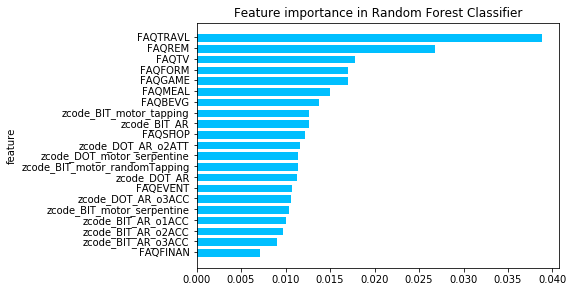

<Figure size 360x360 with 0 Axes>

In [11]:
fig, ax = plt.subplots() 
width = 0.7
ind = np.arange(len(scores))
ax.barh(ind, scores[::-1], width, color="deepskyblue")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(ticks[::-1], minor=False)
plt.title("Feature importance in Random Forest Classifier")
plt.ylabel("feature") 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

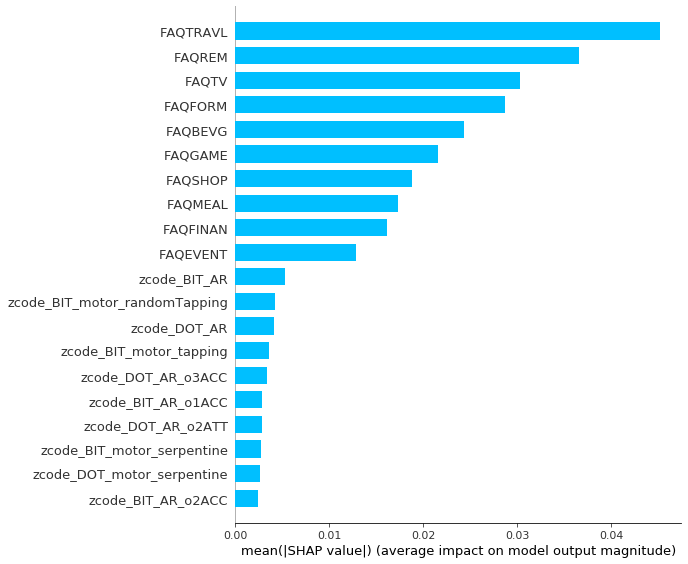

In [12]:
shap_values = shap.TreeExplainer(clf.best_estimator_).shap_values(x_faq)
shap.summary_plot(shap_values[0], x_faq,feature_names = feature_names_faq,plot_type = "bar",color = "deepskyblue")

In [13]:
outer_cv = 10

#Metrics to calculate

specificity = make_scorer(recall_score, pos_label=0)
sensitivity = make_scorer(recall_score, pos_label=1)
mcc = make_scorer(matthews_corrcoef)

s_dict = {"specificity" : make_scorer(recall_score, pos_label=0),
         "sensitivity" : make_scorer(recall_score, pos_label=1),
         "mcc":make_scorer(matthews_corrcoef)}

scores = {'accuracy' : 'accuracy',
         'precision' : 'precision',
          "roc":'roc_auc',
          "balanced_acc":"balanced_accuracy",
         "specificity" : s_dict["specificity"],
         "sensitivity" : s_dict["sensitivity"],
         "MCC":s_dict["mcc"],
         "f1_score":"f1"}

In [14]:
#Random Forest
rf_nested_scores = cross_validate(estimator = clf, X = x_faq, y = y,
        cv = StratifiedKFold(n_splits = outer_cv, shuffle = True, random_state = 1),
                                  scoring = scores, n_jobs = -1, verbose = 1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/maborageh/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed: 16.4min remaining: 10.9min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 25.1min finished


In [15]:
rf_class_probabilities = cross_val_predict(estimator = clf, X = x_faq, y = y,
        cv = StratifiedKFold(n_splits = outer_cv, shuffle = True, random_state = 1)
                                        ,method = "predict_proba", n_jobs = -1, verbose = 1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed: 16.3min remaining: 10.9min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 25.2min finished


In [16]:
rf_proba = rf_class_probabilities[:,1]

rf_fraction_of_positives, rf_mean_predicted_value = calibration_curve(y, rf_proba, n_bins=10)

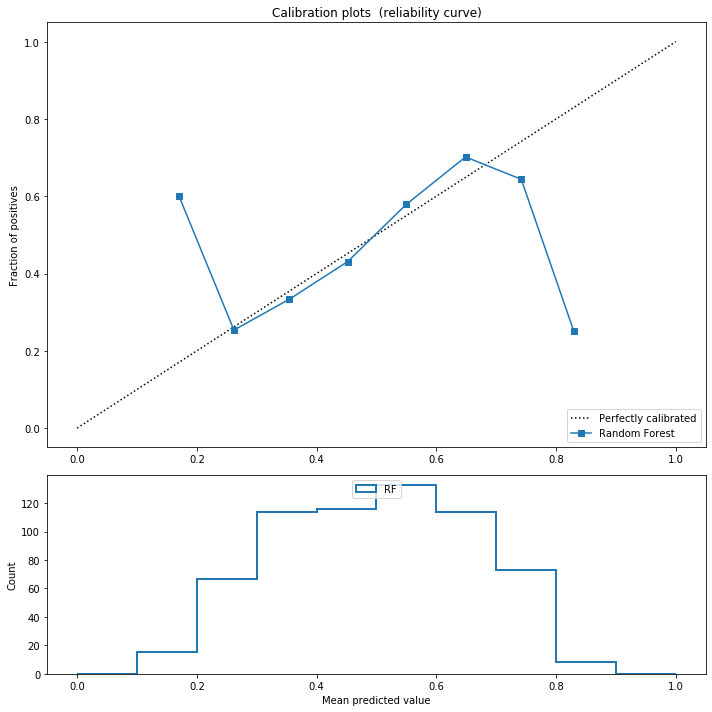

In [17]:
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
ax1.plot(rf_mean_predicted_value, rf_fraction_of_positives, "s-",
             label="%s" % ("Random Forest", ))



ax2.hist(rf_proba, range=(0, 1), bins=10, label="RF",
             histtype="step", lw=2)

    
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

In [18]:
print("Accuracy:", statistics.mean(rf_nested_scores['test_accuracy']))
print("Balanced Accuracy:", statistics.mean(rf_nested_scores['test_balanced_acc']))
print("Precision:", statistics.mean(rf_nested_scores['test_precision']))
print("Specificity:", statistics.mean(rf_nested_scores['test_specificity']))
print("Sensitivity:", statistics.mean(rf_nested_scores['test_sensitivity']))
print("Matthews Correlation Coefficient:", statistics.mean(rf_nested_scores['test_MCC']))
print("F1 Score:", statistics.mean(rf_nested_scores['test_f1_score']))
print("ROC:", statistics.mean(rf_nested_scores['test_roc']))

Accuracy: 0.63125
Balanced Accuracy: 0.63125
Precision: 0.6285512614389471
Specificity: 0.61875
Sensitivity: 0.64375
Matthews Correlation Coefficient: 0.26400985203143446
F1 Score: 0.6343457663660949
ROC: 0.65283203125


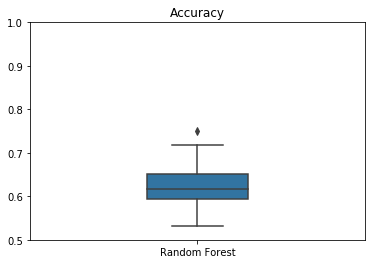

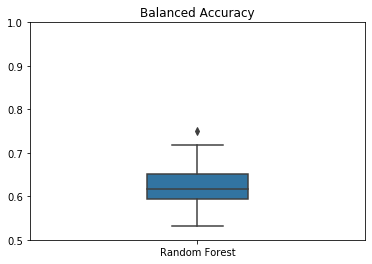

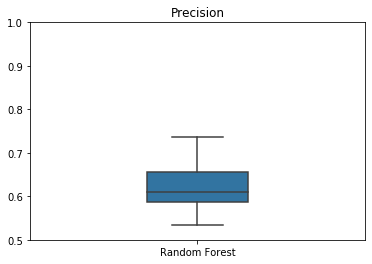

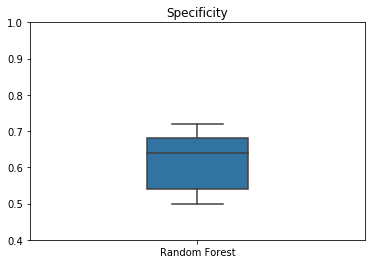

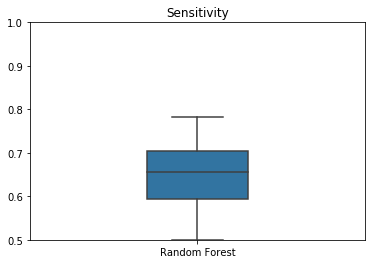

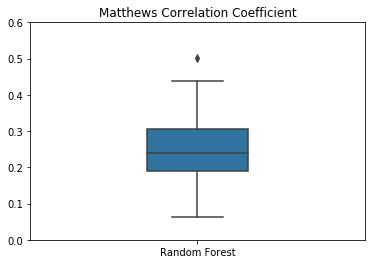

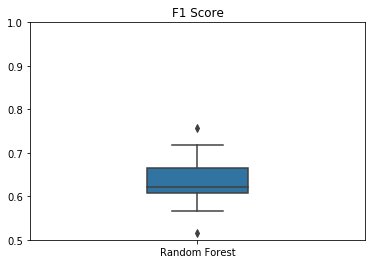

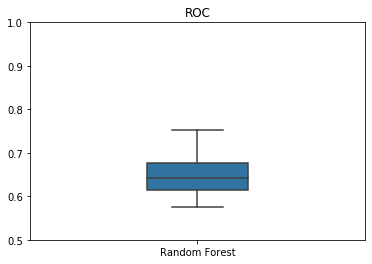

In [19]:
rf_acc = rf_nested_scores['test_accuracy']
sns.boxplot(data = [rf_acc], width = 0.3).set_title("Accuracy")
plt.xticks([0], ["Random Forest"])
plt.ylim(0.5,1)
plt.show()

rf_ba_acc = rf_nested_scores['test_balanced_acc']
sns.boxplot(data = [rf_ba_acc], width = 0.3).set_title("Balanced Accuracy")
plt.xticks([0], ["Random Forest"])
plt.ylim(0.5,1)
plt.show()

rf_precision = rf_nested_scores['test_precision']
sns.boxplot(data = [rf_precision], width = 0.3).set_title("Precision")
plt.xticks([0], ["Random Forest"])
plt.ylim(0.5,1)
plt.show()

rf_spec = rf_nested_scores['test_specificity']
sns.boxplot(data = [rf_spec], width = 0.3).set_title("Specificity")
plt.xticks([0], ["Random Forest"])
plt.ylim(0.4,1)
plt.show()

rf_sens = rf_nested_scores['test_sensitivity']
sns.boxplot(data = [rf_sens], width = 0.3).set_title("Sensitivity")
plt.xticks([0], ["Random Forest"])
plt.ylim(0.5,1)
plt.show()

rf_mcc = rf_nested_scores['test_MCC']
sns.boxplot(data = [rf_mcc], width = 0.3).set_title("Matthews Correlation Coefficient")
plt.xticks([0], ["Random Forest"])
plt.ylim(0,0.6)
plt.show()

rf_f1 = rf_nested_scores['test_f1_score']
sns.boxplot(data = [rf_f1], width = 0.3).set_title("F1 Score")
plt.xticks([0], ["Random Forest"])
plt.ylim(0.5,1)
plt.show()

rf_roc = rf_nested_scores['test_roc']
sns.boxplot(data = [rf_roc], width = 0.3).set_title("ROC")
plt.xticks([0], ["Random Forest"])
plt.ylim(0.5,1)
plt.show()